# <center>__Assignment 1__ </center>

## <center>__Ben Karabinus__</center>

## <center>__COMP 4432, Summer Quarter 2022__</center>



In [21]:
"""import necessary libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
from sklearn.feature_selection import SelectKBest, f_regression

## Assignment 1, Part 1

Data Loading and Preparation. Load the diabetes dataset
into two numpy arrays: one for the feature set and one for the target. Pick a
single feature to try to predict the target (disease progression). Document the
reason you chose the feature you did. Break your single feature and target sets
into training and test sets with the last 20 rows being in the test set.

In [37]:
"""load diabetes dataset form scikit-learn"""

diabetes_bunch = data.load_diabetes(as_frame=True)
diabetes_df = diabetes_bunch['data']
# create data frame for visualization
diabetes_df['disease_progression'] = diabetes_bunch['target']
# create arrays for fitting model
X = np.array(diabetes_df.iloc[:, :-1])
y = np.array(diabetes_df.iloc[:, -1:]).ravel()


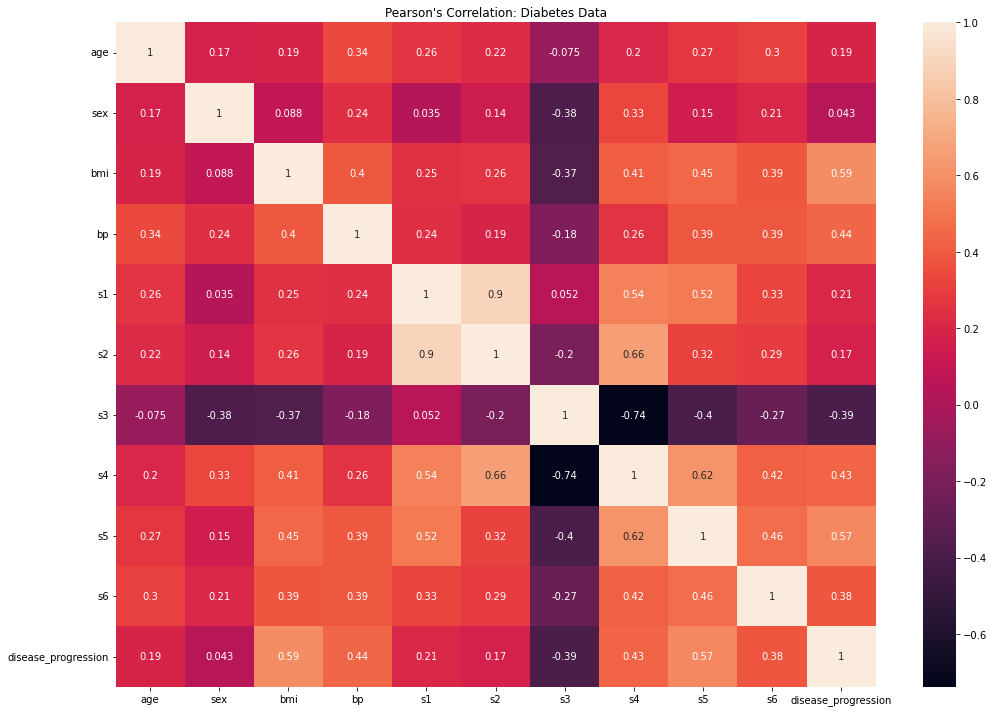

In [38]:
"""plot pearson's correlation to help in selecting a single predictor"""
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Pearson\'s Correlation: Diabetes Data')
sns.heatmap(diabetes_df.corr(), annot=True)
plt.tight_layout()

Plotting Pearson's correlation for the Diabetes dataset shows that the feature bmi (body mass index) appears to have the strongest relationship with the target, disease_progression. To further validate this assumption we can use the f_regression() function available for import from scikit-learn.

In [39]:
"""apply f_regression() to diabetes data and print results"""
f_reg = f_regression(X, y)
f_reg

(array([ 16.10137401,   0.81742349, 230.65376449, 106.52013086,
         20.71056745,  13.74607917,  81.23965868, 100.06926441,
        207.27119362,  75.3996832 ]),
 array([7.05568615e-05, 3.66429295e-01, 3.46600645e-42, 1.64937205e-22,
        6.92071179e-06, 2.35984810e-04, 6.16286470e-18, 2.30425328e-21,
        8.82645896e-39, 7.58008327e-17]))

Running f_regression() further validates that bmi is a strong predictor of the target, disease progression. The first array in the above output specifies the calculated F-statistic and the second array specifies the corresponding p-value. The bmi predictor (value in position 2 in each array) has both the greatest F-statistic and most significant p-value of any predictor.